In [80]:
import pandas as pd
import matplotlib.pyplot as plt
path = '/Users/aymericvie/Documents/GitHub/evology/evology/data/replication/empirical_funds/flow_data.csv'
df = pd.read_csv(path)


In [81]:
print(df.columns)

Index(['Unnamed: 0', 'cik', 'series_id', 'form', 'report_date', 'as_of_date',
       'total_assets', 'total_liabilities', 'net_assets',
       'month_1_flow_redemption', 'month_1_flow_reinvestment',
       'month_1_flow_sales', 'month_2_flow_redemption',
       'month_2_flow_reinvestment', 'month_2_flow_sales',
       'month_3_flow_redemption', 'month_3_flow_reinvestment',
       'month_3_flow_sales'],
      dtype='object')


In [82]:
sum_net_assets = df['net_assets'].sum()
sum_changes_month1 = df['month_1_flow_redemption'].sum() + df['month_1_flow_sales'].sum() + df['month_1_flow_reinvestment'].sum()

variation_month_1 = 100 * abs(sum_changes_month1 / sum_net_assets)
print(variation_month_1)

sum_changes_month2 = df['month_2_flow_redemption'].sum() + df['month_2_flow_sales'].sum() + df['month_2_flow_reinvestment'].sum()

variation_month_2 = 100 * abs(sum_changes_month2 / sum_net_assets)
print(variation_month_2)

sum_changes_month3 = df['month_3_flow_redemption'].sum() + df['month_3_flow_sales'].sum() + df['month_3_flow_reinvestment'].sum()

variation_month_3 = 100 * abs(sum_changes_month3 / sum_net_assets)
print(variation_month_3)

print('Average ' + str(variation_month_1 / 3 + variation_month_2 / 3 + variation_month_3 / 3))

4.466510031767579
4.4869492062410625
5.072889576359245
Average 4.6754496047892955


37.01415322557278
6.021584872591117


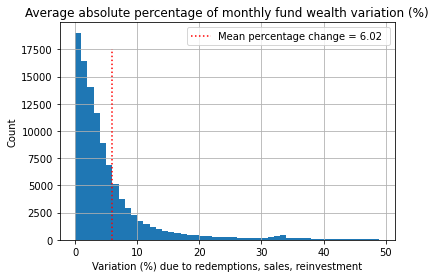

In [83]:
''' Distribution '''
import numpy as np

df['Flow1'] = abs((df['month_1_flow_redemption'] + df['month_1_flow_sales'] + df['month_1_flow_reinvestment']) / df['net_assets'])
df['Flow2'] = abs((df['month_2_flow_redemption'] + df['month_2_flow_sales'] + df['month_2_flow_reinvestment']) / df['net_assets'])
df['Flow3'] = abs((df['month_3_flow_redemption'] + df['month_3_flow_sales'] + df['month_3_flow_reinvestment']) / df['net_assets'])

df['FlowAvg'] = 100 * (df['Flow1'] / 3 + df['Flow2'] / 3 + df['Flow3'] / 3)
df.replace([np.inf, -np.inf], np.nan,inplace=True)
print(df['FlowAvg'].mean())
# df['FlowAvg'] = df['FlowAvg'].apply(lambda x: [y if y <= 100 else 100 for y in x])
df['FlowAvg'].values[df['FlowAvg'] > 50] = 50
print(df['FlowAvg'].mean())

df.hist(column='FlowAvg', bins = range(0,50))
plt.title('Average absolute percentage of monthly fund wealth variation (%)')
plt.xlabel('Variation (%) due to redemptions, sales, reinvestment')
plt.ylabel('Count')
num = round(df['FlowAvg'].mean(),2)
plt.vlines(num, colors='r', ymin = 0, ymax = 17500, linestyles='dotted', label= 'Mean percentage change = %.2f ' % num)
plt.legend()
plt.show()
